In [1]:
from IPython.display import display
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics import cohen_kappa_score
nltk.download('wordnet', quiet=True)

HTML('''<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script><script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off for raw code"></form>
''')

In [2]:
%%HTML
<script src="require.js"></script>

<img src="Cover.png" />

<span style="display: block; height: 1px; border: 0; border-top: 10px solid #001DB1; margin: 1em 0; padding: 0;"></span>

# <span style="color:#FF4922; font-weight:bold"> ABSTRACT </span>

This study addresses challenges in the e-commerce industry, specifically focusing on refining recommendation engines to offer more precise, unbiased, and relevant results. With the proliferation of e-commerce platforms, users often face difficulties in efficiently matching their queries with accurate product recommendations, leading to time-consuming searches and dissatisfaction. The research methodology involves web scraping data from Lazada, followed by comprehensive data cleansing and lemmatization to enhance the quality of textual information. The Term Frequency-Inverse Document Frequency (TF-IDF) technique is then applied for vectorization, and cosine similarity and Jaccard similarity are employed for measuring resemblance between data points.

The study reveals that the LT recommendation engine outperforms its counterparts, achieving higher similarity scores based on both Cosine similarity and Jaccard distance metrics. However, the conclusion emphasizes the importance of improving data quality and preprocessing methods to further enhance the reliability of similarity matching. Notably, while Lazada's recommendation engine considers visitor product histories, concerns persist regarding inaccuracies and biases. The LT recommends a straightforward approach to address these issues, promoting user satisfaction and trust in e-commerce platforms. The findings underscore the significance of continuous improvement in recommendation systems, offering actionable insights for both users and e-commerce platform owners.

<hr>

# <span style="color:#FF4922; font-weight:bold"> INTRODUCTION </span>

E-commerce began with giants like Amazon and eBay, which have been operating online for over 20 years. The e-commerce industry is a billion-dollar entity that continues to grow. Initially catering to domestic populations, these e-commerce platforms have expanded their reach as technology has advanced. Now, customers can effortlessly buy from suppliers worldwide, and remarkably, delivery speeds have increased. As e-commerce has advanced, its features and services have adapted to customer needs, with a particular emphasis on improving the overall customer experience.

<br>

The Philippines embraced the e-commerce industry in the early 2000s with platforms like *sulit.com*, primarily dealing with second-hand items. However, the real surge in e-commerce occurred in the 2010s with the introduction of *Shopee* and *Lazada*. The COVID-19 pandemic further accelerated the growth of e-commerce in the country as lockdowns prompted a widespread shift to online shopping, making it the preferred choice for consumers ([source](https://www.statista.com/statistics/1225172/philippines-usage-e-commerce-covid-19-lockdown/)).

<br>

<center>
<img src="Usage.PNG" width ="500"/>
</center>

<center> <b> Fig. 1: E-commerce usage comparison before, during, and after COVID-19 </b></center>

<br>

Despite serving as a lifeline for many during the pandemic, the e-commerce industry faced its own set of challenges. Ongoing efforts are dedicated to addressing these challenges and refining the overall e-commerce experience for consumers.

<br>


Successful e-commerce websites distinguish themselves by tackling a common challenge: converting window shoppers into actual customers. To achieve this, e-commerce managers employ strategies that position their platforms as reliable resources for exploring desired products. By showcasing similar items during a customer's browsing session, these websites aim to extend the duration of engagement <small> ([source](https://www.linkedin.com/pulse/how-you-can-like-lazadaid-blibli-ecommerce-product-pandu-truhandito/)) </small>.

<br>

In 2022, a Lazada report highlighted a shift in the behavior of Southeast Asian (SEA) consumers during the pandemic. The report revealed that "around 57% of shoppers in Southeast Asia now directly search for products on eCommerce platforms, moving away from the more frequently employed search engines" <small> ([source](https://www.philstar.com/business/technology/2022/09/01/2206658/ditching-search-engines-southeast-asians-look-products-ecommerce-sites-report)). </small>



<hr>

# <span style="color:#FF4922; font-weight:bold"> MOTIVATION </span>

Lazada employs a recommendation engine strategy by storing visitor product histories and generating top product recommendations based on frequent occurrences in those histories. For instance, if multiple visitors explore Xiaomi Redmi, the engine suggests products commonly viewed along their respective paths. This approach comes with notable advantages, including enhanced relevancy due to real visitor behavior and the avoidance of bias toward specific product attributes. However, it poses challenges such as potential infrastructure strain for quick service and the necessity for additional systems to manage visitor behavior at scale. <small> ([source](https://www.linkedin.com/pulse/how-you-can-like-lazadaid-blibli-ecommerce-product-pandu-truhandito/)) </small>

<br>

Despite its strengths, there is a potential downside to this strategy known as the *filter bubble effect*. This phenomenon can restrict users to products similar to their past preferences, limiting exposure to new and diverse items. Moreover, there is no guarantee that this approach will lead to the discovery of high-quality products.

<br>

Instances of skewed recommendations, as reported on platforms like Reddit, highlight these challenges. Users have voiced complaints about unsettling Lazada search recommendations and expressed concerns about inaccuracies in recommendations. Examples include:
- [User complaints about creepy Lazada search recommendations](https://www.reddit.com/r/Philippines/comments/yf4k09/anyone_getting_creepy_lazada_search_recos/)
- [Concerns about inaccurate recommendations on Shopee from Lazada](https://www.reddit.com/r/ShopeePH/comments/17srszu/bakit_nirerecommend_eto_ng_lazada_its_so_wrong/)

<br>

These biases have the potential to impact the overall user experience by narrowing the range of recommendations, potentially hindering user satisfaction and eroding trust in the recommendation system.

<br>

Addressing these challenges is paramount for e-commerce platforms to provide fair, accurate, and diverse recommendations. This is crucial for enhancing user satisfaction and instilling trust in the platform's recommendation capabilities.

<hr>

# <span style="color:#FF4922; font-weight:bold"> PROBLEM STATEMENT </span>

Given the challenges identified in e-commerce platforms, a significant problem arises concerning the efficacy of customer query matching. While the recommendation of customer searches is generally acceptable, it frequently inundates users with an extensive array of products, necessitating meticulous sifting through the results. For example, a search for a female's shirt may yield a number of pages of products, many of which may not directly align with the sought-after item.

<br>

In today's fast-paced environment, time is of the essence. Users would prefer recommendations that are accurate and streamlined, minimizing the time spent sifting through a plethora of unrelated products.

<br>

There is a clear incentive to both enhancing users and e-commerce platform owners to enhance the utility of their platforms by addressing such challenges. The question then arises: **How can we refine the  recommendation engine of e-commerce sites to provide more precise, unbiased, and relevant results?**

<span style="display: block; height: 1px; border: 0; border-top: 10px solid #001DB1; margin: 1em 0; padding: 0;"></span>

# <span style="color:#FF4922; font-weight:bold"> SCOPE AND LIMITATIONS OF THE STUDY </span>

The Learning Team (LT) is motivated to explore possible enhancements to the recommendation engine of e-commerce site with the goal of improving the overall customer experience on the platform. Dedicated to identifying possible enhancements the recommendation algorithms to effectively address user concerns and deliver a more unbiased and accurate search.

<br>

The collective objective extends beyond meeting user expectations to building trust by fostering loyalty and satisfaction. Through the refinement of the recommendation engine, the team aims to empower users to discover products aligned with their preferences, enhancing the overall utility of the e-commerce platform. Acknowledging the strategic correlation between an enriched user experience and revenue <small> ([source1](https://www.bigcommerce.com/blog/ecommerce-ux/), [source2](https://www.divami.com/blog/user-experience-its-impact-on-revenue-growth))</small>, the optimization of the recommendation engine
will also encourages users to explore diverse products, make informed purchases, and contribute to increased transaction frequency -- resulting to a positive impact to the platform's revenue.

<br>

To explore possible enhancements of the recommendation algorithm of e-commerce sites, the LT chose to concentrate its efforts on the Lazada platform. Given Lazada's vast array of products, the LT further narrowed its focus to the Women's Clothing category for an in-depth study. The selection of the Women's Clothing category is justified by the challenges in accurately categorizing garments. This category also provides a diverse range of items and subcategories, encompassing a broad spectrum of products.

<br>

Here is an overview of Lazada's Women's Clothing product listing subcategories:

* Casual Shorts
* Dresses
* Hoodies and Sweatshirts
* Overalls and Jumpsuits
* Pants
* Tops
* Skirts

<br>

**Limitations of the Study:**

- The accuracy and freshness of the dataset are contingent on the time of extraction, acknowledging potential changes in product listings over time as Lazada often updates their displayed product listings

- Lazada's product listing pagination is capped at 102, with 40 products listed per page. Consequently, only 4080 products were extracted per category, even if the actual count within a certain category surpasses this limit. Additionally, it's worth noting that Lazada sometimes lists duplicate items (with the same identifier) per page, potentially affecting the overall count and analysis.

- Product availability status (In stock, No stock, Limited quantity) will not be considered in this study. The primary objective is to enhance the precision of matches and recommendations.

- The study will solely focus on product features such as name, description, price, and numerical ratings. It will not delve into the analysis of customers sentiment on reviews.

<br>

**Assumptions in the Study:**

- The spelling of words or strings found in the name and description which the text similarity to be performed on is assumed correct and without errors. Corrections of such mistake in spellings is not covered by this paper.

<span style="display: block; height: 1px; border: 0; border-top: 10px solid #001DB1; margin: 1em 0; padding: 0;"></span>


# <span style="color:#FF4922; font-weight:bold"> METHODOLOGY </span>


The methodology employed in this study involved a multi-step process to analyze and extract meaningful insights from the collected data. Initial data collection was carried out through web scraping, sourcing information from the e-commerce site Lazada. Subsequently, a thorough data cleansing process was implemented, which included the removal of duplicate entries, elimination of null values, stripping away special characters, and standardizing text by converting it to lowercase. To further refine the textual data, lemmatization using the Natural Language Toolkit (NLTK) was applied to reduce words to their base or root forms.

Following the data preparation steps, the text data underwent vectorization using the Term Frequency-Inverse Document Frequency (TF-IDF) technique. This transformation allowed the representation of text in numerical vectors, capturing the importance of terms based on their frequency in the dataset.

Two distinct similarity measurement methods, namely cosine similarity and Jaccard similarity, were employed to quantify the resemblance between data points. Cosine similarity gauged the similarity between vectors, while Jaccard similarity measured the likeness between sets.

Lastly, the retrieval of results was anticipated, emphasizing the practical application of the methodology. This step involved leveraging the computed similarities to identify and recommend similar items or documents, thereby translating the analytical findings into actionable outcomes.

<br>
<center><b>Table 1. </b> Methodology Pipeline</center>


||<center>Variable Name</center>|<center>Description</center>| 
|:---|:---|:---|
| |
|`1`|Data Collection | Data were scraped from Lazada: https://www.lazada.com.ph/shop-womens-clothing/. The website was scraped for 28 features per product. Initial dataset shape was 28560 products with 28 features.
|`2`|Data Cleansing| This involves pre-processing the data such as removal of the usual duplicates. Removal of duplicates were based on the unique identifiers of the products such as nid, sku, and even the name of the product. Null values were also handled, for entries that need to be a number, it was set to 0 and for entries that needs to be a string, '' was set. After data cleaning,  a total of 12,112 products were left for data processing.|
|`3`|Data Vectorization| Natural Language Toolkit (NLTK) library was used to to lemmatize tokens and reduce words to their base form. After the text processing was completed, the Term Frequency-Inverse Document Frequency (TF-IDF) method was used to vectorize the data with the default parameters.|
|`4`|Similarity Measurement| Cosine similarity and Jaccard distance were used as measures to define similarity between a product for recommendation and the pool of products to be recommended.|
|`5`|Recommendation Retrieval| With the similarity measures applied, sorting and filtering was done to recommend the closely relevant products to the selected product.
|`6`|Validation|With retrieved dat, validation was done through the Cohen's Kappa Method.|
    
<br>


<hr>

## 1) Data Collection

Data collection involved web scraping -- systematically iterating through Lazada's Women's Clothing categories, ranging from the first page to the last available page (up to page 102). The gathered data was stored in a CSV file, serving as the primary data source for our analysis.
<br>

### Extracted Dataset Overview:

These key elements collectively form a comprehensive understanding of the products available in the dataset
<br>

- **Name**: The full name of the product listing, which often contains necessary information like category.
- **Item Identifiers (nid, itemid, skuId, sku)**: Unique codes assigned to each product, facilitating precise identification and tracking.
- **Price Information**: This includes `originalPrice` (the price before discounts) and `price` (the current selling price after discounts, if applicable). `originalPriceShow` and `priceShow` indicate whether these prices are displayed in the listing.
- **Discount**: The percentage discount applied to the original price.
- **Ratings and Reviews**: `ratingScore` represents the average rating of the product, and `review` shows the number of customer reviews.
- **Sales Numbers (`itemSoldCntShow`)**: The total number of units sold for each product, indicating its popularity and consumer demand.
- **Product Features**: This encompasses `brandId`, `categories` (the classifications under which the women's clothing is listed), and `attributes` which are additional product details, although this field has missing data in the dataset due to primarily being optional for sellers to fill in.
- **Promotional Status (`isSponsored`, `isAD`)**: Indicators of whether the product listing is sponsored or advertised, which may impact its visibility and sales.
- **Online Presence (`itemUrl`)**: The URL of the product listing, providing a direct link to the product's online page.

<br>

*Refer to **Table 1** for full details.*


<br>

<center> <b>Table 1</b></center>

<center>

| Field                 | Description                                                                                                  |
|-----------------------|--------------------------------------------------------------------------------------------------------------|
| **product_category**  | The category to which the women's clothes listing belongs.                                                             |
| **name**              | The full name of the clothing listing, containing specifications and descriptions.                             |
| **nid**               | Unique code assigned to each product for precise identification and tracking.                                |
| **itemid**            | Another identifier for product tracking.                                                                      |
| **isSmartImage**      | Indicator of whether the product listing includes a smart image.                                              |
| **originalPriceShow** | Indicates whether the original price is displayed in the listing.                                              |
| **originalPrice**     | The price of the clothing before any discounts.                                                                 |
| **priceShow**         | Indicates whether the current selling price is displayed in the listing.                                      |
| **price**             | The current selling price after discounts, if applicable.                                                     |
| **discount**          | The percentage discount applied to the original price.                                                        |
| **ratingScore**       | The average rating of the product based on customer reviews.                                                   |
| **review**            | The number of customer reviews for the product.                                                               |
| **location**          | The location information related to the product listing.                                                       |
| **description**       | A brief description of the clothing.                                                                            |
| **thumb**             | Thumbnail image of the product.                                                                               |
| **sellerName**        | The name of the seller.                                                                                      |
| **sellerId**          | Identifier for the seller.                                                                                   |
| **brandName**         | The brand name of the clothing.                                                                                |
| **brandId**           | Identifier for the brand.                                                                                    |
| **skuId**             | Identifier for the product's stock-keeping unit (SKU).                                                        |
| **sku**               | Stock-keeping unit of the product.                                                                           |
| **skus**              | Additional information about stock-keeping units.                                                             |
| **categories**        | Classifications under which the clothing is listed.                                                            |
| **attributes**        | Additional details about the product (some missing data in the dataset).                                     |
| **isSponsored**       | Indicator of whether the product listing is sponsored.                                                        |
| **isAD**              | Indicator of whether the product listing is advertised.                                                       |
| **itemSoldCntShow**   | The total number of units sold for each product, indicating popularity and consumer demand.                  |
| **itemUrl**           | URL of the product listing, providing a direct link to the product's online page.                             |

</center>



### Data Scraping Code

#### Main Webscraping Code

```python
def lazada_scraper(url):
    """
    Scrapes women's garments, specs, and prices from Lazada and returns a pandas DataFrame.
    """

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
        'Referer': 'https://www.lazada.com.ph/',
        'X-Requested-With': 'XMLHttpRequest'
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()

        laptops = []
        for item in data['mods']['listItems']:
            laptops.append({
                "name_specs": item.get('name', 'No Name'),
                "nid": item.get('nid', 'No NID'),
                "itemid": item.get('itemId', 'No Item ID'),
                "isSmartImage": bool(item.get('isSmartImage', False)),
                "originalPriceShow": bool(item.get('originalPriceShow', False)),
                "originalPrice":  float(item.get('originalPrice', 0)),
                "priceShow": bool(item.get('priceShow', False)),
                "price": float(item.get('price', 0)),
                "discount": float(item.get('discount').replace('% Off', '')) if item.get('discount') else None,
                "ratingScore": float(item.get('ratingScore', 0)),
                "review": int(item.get('review')) if item.get('review') and item.get('review').isdigit() else None,
                "location": item.get('location', 'No location'),
                "description": '; '.join(map(str, item.get('description', []))),
                "thumb": len(item.get('thumbs', [])),
                "sellerName": item.get('sellerName', 'No sellerName'),
                "sellerId": item.get('sellerId', 'No sellerId'),
                "brandName": item.get('brandName', 'No brandName'),
                "brandId": item.get('brandId', 'No brandId'),
                "skuId": item.get('skuId', 'No skuId'),
                "sku": item.get('sku', 'No sku'),
                "skus": '; '.join([str(sku.get('id', '')) for sku in item.get('skus', [])]),
                "categories": '; '.join(map(str, item.get('categories', []))),
                "attributes": '; '.join(map(str, item.get('attributes', {}).get('content', []))),
                "isSponsored": bool(item.get('isSponsored', False)),
                "isAD": bool(item.get('isAD', False)),
                "itemSoldCntShow": float(item.get('itemSoldCntShow', '0').replace(',', '').replace('+', '').split(' ')[0]),
                "itemUrl": item.get('itemUrl', 'itemUrl').lstrip('//')
            })

        df = pd.DataFrame(laptops)
        return df
    else:
        print(f"Error: {response.status_code}")
```

#### Iteration Code for Each Category

```python
output_file = 'final_clothes_output.csvfinal_clothes_output.csv'

# Initialize an empty DataFrame to create the CSV file with headers
columns = [
    "name",
    "nid",
    "itemid",
    "isSmartImage",
    "originalPriceShow",
    "originalPrice",
    "priceShow",
    "price",
    "discount",
    "ratingScore",
    "review",
    "location",
    "description",
    "thumb",
    "sellerName",
    "sellerId",
    "brandName",
    "brandId",
    "skuId",
    "sku",
    "skus",
    "categories",
    "attributes",
    "isSponsored",
    "isAD",
    "itemSoldCntShow",
    "itemUrl"
]

initial_df = pd.DataFrame(columns=columns)
initial_df.to_csv(output_file, index=False)


clothes_classification = []

# Iterate through 102 pages
for page_number in range(1, 103):
    url = f'https://www.lazada.com.ph/shop-womens-clothing/?ajax=true&page={page_number}'

    #print(page_number)
    # Scrape Lazada data and append to the CSV file
    df_page = lazada_scraper(url)

    # Append the DataFrame to the CSV file
    df_page.to_csv(output_file, mode='a', header=not page_number, index=False)

    # Sleep for 5 seconds before making the next request
    time.sleep(5)
```

During the scraping process, the LT had encoutered issues when using Jojie as the attempts to scrape was being blocked by Lazada. The workaround done was to run the code in Google Collab. The data set was saved to a csv file and to show a glimpse of the data set refer below:

In [3]:
df = pd.read_csv('final_clothes_output.csv')
df.head(3)

,product_category,name,nid,itemid,isSmartImage,originalPriceShow,originalPrice,priceShow,price,discount,...,brandId,skuId,sku,skus,categories,attributes,isSponsored,isAD,itemSoldCntShow,itemUrl
0,womens_casual_shorts,Japanese Basic Shorts Women Shorts Cotton Line...,3250613856,3250613856,False,False,175.0,True,118.0,33.0,...,29872,16366801380,3250613856_PH,3250613856_PH-16366801380; 3250613856_PH-16366...,6851; 7391; 8465; 21258,NaN,False,False,413,www.lazada.com.ph/products/japanese-basic-shor...
1,womens_casual_shorts,3353 Unisex 2-in-1 Running Shorts Quick Drying...,2704903128,2704903128,False,False,0.0,True,176.0,NaN,...,29872,12925026528,2704903128_PH,2704903128_PH-12925026517; 2704903128_PH-12925...,6851; 7391; 8465; 21258,NaN,False,False,95,www.lazada.com.ph/products/3353-unisex-2-in-1-...
2,womens_casual_shorts,Apple Blossoms PH Trendy Korean Style Skirt Sh...,1497730856,1497730856,True,False,0.0,True,169.0,NaN,...,29872,14502765382,1497730856_PH,1497730856_PH-14502765382; 1497730856_PH-15337...,6851; 7391; 8465; 21258,NaN,False,False,316,www.lazada.com.ph/products/apple-blossoms-ph-t...


In [4]:
df.shape

(28560, 28)

As shown above, the dataset extracted has 28,560 rows and 28 columns which came from 7 different women clothing categories with 102 pages extracted each, for each page there are 40 products displayed. For the categories, please refer to the dataframe below.

In [5]:
category_counts = pd.DataFrame(
    df['product_category'].value_counts()).reset_index()


category_counts.columns = ['Product Category', 'Count']

# Add a total row
total_row = pd.DataFrame({'Product Category': ['Total'], 'Count': [
                         category_counts['Count'].sum()]})
category_counts = pd.concat([category_counts, total_row], ignore_index=True)
category_counts

,Product Category,Count
0,womens_casual_shorts,4080
1,womens_dresses,4080
2,womens_hoodies_sweatshirts,4080
3,womens_overalls_jumpsuits,4080
4,womens_clothing_pants,4080
5,womens_tshirt_tops,4080
6,womens_skirts,4080
7,Total,28560


## 2) Data Cleaning
    
The implementation of a thorough data cleaning process serves to streamline data processing, ensuring a seamless and trouble-free experience. This proactive approach not only contributes to the overall smoothness of data operations but also significantly enhances the system's accuracy. Key components of data cleaning, such as the removal of duplicates and special characters, is pivotal in the integrity of the dataset. By eliminating redundancies and irrelevant characters, the data becomes more coherent and ready for processing.

1. **Remove Duplicates**

    Identify and eliminate duplicate entries based on unique identifiers (`nid`, `itemid`, `skuId`, `sku`) to enhance data integrity

In [6]:
df_nid_dropped = df.drop_duplicates(subset='nid')
print('nid - Duplicates Removed.')
print(f'Total Records: {df_nid_dropped.shape}')

nid - Duplicates Removed.
Total Records: (12851, 28)


In [7]:
df_names_dropped = df_nid_dropped.drop_duplicates(subset='itemid')
print('itemid - Duplicates Removed.')
print(f'Total Records: {df_names_dropped.shape}')

itemid - Duplicates Removed.
Total Records: (12851, 28)


In [8]:
df_skuId_dropped = df_names_dropped.drop_duplicates(subset='skuId')
print('skuId- Duplicates Removed.')
print(f'Total Records: {df_skuId_dropped.shape}')

skuId- Duplicates Removed.
Total Records: (12851, 28)


In [9]:
df_sku_dropped = df_skuId_dropped.drop_duplicates(subset='sku')
print('sku - Duplicates Removed.')
print(f'Total Records: {df_sku_dropped.shape}')

sku - Duplicates Removed.
Total Records: (12851, 28)


From the previous steps, it is ensured that the product listings are unique from each other. Details for the dataset is shown in the dataframe below, wherein it can be seen that a lot of duplicate products were seen from the pants, dresses, and shorts categories. 42% of the original data set are unique products and it means that certain products are resold and have lots of product listings even if it is pertaining to the same item uniquely identified by its sku.

In [10]:
filtered_category_counts = pd.DataFrame(
    df_sku_dropped['product_category'].value_counts()).reset_index()


filtered_category_counts.columns = ['Product Category', 'Count']

# Add a total row
filtered_total_row = pd.DataFrame({'Product Category': ['Total'], 'Count': [
    filtered_category_counts['Count'].sum()]})
filtered_category_counts = pd.concat(
    [filtered_category_counts, filtered_total_row], ignore_index=True)
filtered_category_counts

,Product Category,Count
0,womens_skirts,2698
1,womens_hoodies_sweatshirts,2200
2,womens_tshirt_tops,2004
3,womens_overalls_jumpsuits,1973
4,womens_clothing_pants,1594
5,womens_dresses,1236
6,womens_casual_shorts,1146
7,Total,12851



2. **Handle Null Values**

   Implement strategies to handle null values ensuring completeness in the dataset. Especially for the name and description values which will primarily be the main data that the search for similarity is conducted on.

   - Address missing values in numerical columns (`review`, `discount`) by replacing null entries  with default value 0.
   - Ensure text columns (`name`, `description`) have string data by replacing null entries with empty strings ('').
   - Adjust values based on logical conditions, such as setting `originalPrice` to equal `price` for cases of zero discounts.<br><br>
   
   ```python
        # 0 for numerical values
        df['discount'].fillna(0, inplace=True)
        df['review'].fillna(0, inplace=True)

        # '' for text values
        df['attributes'].fillna('', inplace=True)
        df['description'].fillna('', inplace=True)

        # if discount is 0, use price value for originalPrice
        df.loc[df['discount'] == 0, 'originalPrice'] = df['price']
    ```
    
<br>


In [11]:
df_dropped_duplicates = df_sku_dropped
df_dropped_duplicates['discount'].fillna(0, inplace=True)
df_dropped_duplicates['review'].fillna(0, inplace=True)

# '' for text values
df_dropped_duplicates['attributes'].fillna('', inplace=True)
df_dropped_duplicates['description'].fillna('', inplace=True)

df_dropped_duplicates.head(4)

,product_category,name,nid,itemid,isSmartImage,originalPriceShow,originalPrice,priceShow,price,discount,...,brandId,skuId,sku,skus,categories,attributes,isSponsored,isAD,itemSoldCntShow,itemUrl
0,womens_casual_shorts,Japanese Basic Shorts Women Shorts Cotton Line...,3250613856,3250613856,False,False,175.0,True,118.0,33.0,...,29872,16366801380,3250613856_PH,3250613856_PH-16366801380; 3250613856_PH-16366...,6851; 7391; 8465; 21258,,False,False,413,www.lazada.com.ph/products/japanese-basic-shor...
1,womens_casual_shorts,3353 Unisex 2-in-1 Running Shorts Quick Drying...,2704903128,2704903128,False,False,0.0,True,176.0,0.0,...,29872,12925026528,2704903128_PH,2704903128_PH-12925026517; 2704903128_PH-12925...,6851; 7391; 8465; 21258,,False,False,95,www.lazada.com.ph/products/3353-unisex-2-in-1-...
2,womens_casual_shorts,Apple Blossoms PH Trendy Korean Style Skirt Sh...,1497730856,1497730856,True,False,0.0,True,169.0,0.0,...,29872,14502765382,1497730856_PH,1497730856_PH-14502765382; 1497730856_PH-15337...,6851; 7391; 8465; 21258,,False,False,316,www.lazada.com.ph/products/apple-blossoms-ph-t...
3,womens_casual_shorts,Ladies Taslan Rainbow 🌈 Tape Shorts with 2 Poc...,2182005991,2182005991,True,False,99.0,True,87.0,12.0,...,29872,9798133964,2182005991_PH,2182005991_PH-9798133963; 2182005991_PH-979813...,6851; 7391; 8465; 21258,Plus Size; A-Line,False,False,280,www.lazada.com.ph/products/ladies-taslan-rainb...


    
<br>


3. **Remove Special Characters, Numbers, Extra White Spaces and Lowercasing of string**

   Clean textual data, specifically in the `name` and `description` columns, by removing special characters, numbers and white spaces.
   
   ```python
        df['name'] = df['name'].str.replace(r'[^a-zA-Z0-9\s.\',\-_]', ' ').str.replace('\s+', ' ', regex=True)
        df['description'] = df['description'].str.replace(r'[^a-zA-Z0-9\s.\',\-_]', ' ').str.replace('\s+', ' ', regex=True)
    ```
    

The regular expression was used to clean the string. It aims to remove all characters not included in the english alphabet including numbers. It also does the lowercasing of entries to remove the case sensitivity between the matches.

In [12]:
def clean_and_lower(input_string):
    '''Retain only alphabetic characters in lowercase.'''
    cleaned_string = re.sub(r'[^a-zA-Z\s]', '', input_string)
    return cleaned_string.lower()


df_dropped_duplicates['name'] = df_dropped_duplicates['name'].apply(
    lambda x: clean_and_lower(x))
df_dropped_duplicates['description'] = df_dropped_duplicates[
    'description'].apply(lambda x: clean_and_lower(x))

df_cleaned = df_dropped_duplicates

## 3) Data Vectorization

The methodology takes a multi-step approach, starting with lemmatization, efforts are directed towards standardizing the representation of words in both the product at hand and the reference dataset that will be the pool for the product recommendation. This initial step significantly diminishes the diversity of word forms, promoting more simpler and meaningful comparisons. Following lemmatization, the application of **TF-IDF (Term Frequency-Inverse Document Frequency)** comes into play, transforming the lemmatized words into vectors. This dual-stage process not only facilitates the segmentation of text into meaningful units but also generates numerical representations, optimizing the suitability for accurate similarity measurements.

Before vectorization of the words found in the name of the product, to simplify the search by similarity the built-in function **WordnetLemmatizer()** was used to transform variations of words to its root word. A standalone function was made for easy understanding as can be seen below.


In [13]:
def lemmatize_text(text):
    '''Return lemmatized tokens.'''
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token, wordnet.VERB)
                         for token in tokens]
    return ' '.join(lemmatized_tokens)

After an input string is passed through the lemmatize function above, it would then be passed through a function that will do TF-IDF(Term Frequency-Inverse Document Frequency) that will make the strings vectorized. The function is defined below.

In [14]:
def calculate_tfidf_matrix(data):
    '''Return TFIDF matrix of the data.'''
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    return tfidf_vectorizer.fit_transform(data), tfidf_vectorizer

## 4) Similarity Measurement
After performing the TF-IDF transformation, the next step involves utilizing similarity scoring through cosine similarity and Jaccard similarity. Cosine similarity assesses performance based on the similarity of the directions of two vectors, while Jaccard similarity stems from a focus on the commonality of elements in two sets. These are considered recommended similarity scores for string-based data. By combining these scores, the analogous structures of products can be measured, allowing for an effective identification of similar items within a database.

Both cosine similarity and Jaccard similarity functions are defined below.

```python
def compute_cosine_similarity(target_vector, tfidf_matrix):
    '''Calculate cosine similarity.'''
    return cosine_similarity(target_vector, tfidf_matrix).flatten()
```

```python
def compute_jaccard_similarity(str1, str2):
    '''Calculate jaccard similarity.'''
    a = set(str1.split())
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))
```

In [15]:
def compute_cosine_similarity(target_vector, tfidf_matrix):
    '''Calculate cosine similarity.'''
    return cosine_similarity(target_vector, tfidf_matrix).flatten()

In [16]:
def compute_jaccard_similarity(str1, str2):
    '''Calculate jaccard similarity.'''
    a = set(str1.split())
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

## 5) Recommendation Retrieval
Both cosine similarity and Jaccard distance has range of values from 0 to 1, with 1 indicating the most similarity between two vectors of interest. Ideally, one would want to both have these measures to be 1 to have a perfect recommendation but in reality, what is being aimed it is to have the closes score to 1.

For the retrieval of recommendations, for this particular use case, scoring of similarity utilized both the cosine and Jaccard scores by putting weights for each. By combining the two similarity is expected to increase the value of the similarity of the two titles ([source](https://core.ac.uk/download/pdf/86430721.pdf)).

Instead of just basing our recommendation on one similarity score, a combined score was made. The line in the code is as follows :


```python
    combined_scores = 0.7 * cosine_sim_scores + 0.3 * jaccard_sim_scores
```

wherein:

- `combined_scores` : The score where the ranking will be based

- `cosine_sim_scores` : The cosine similarity score.

- `jaccard_sim_scores`: The jaccard similarity score.
    
As to why, 70% is given to the cosine similarity and 30% for the jaccard distance -- cosine similarity could be used for capturing the relevance of documents to a query, while Jaccard similarity might consider the overlap of keywords. A 70-30 combination is what we have deemed to be suitable for this use case.

The combined score is now the basis for ranking the product recommendation and is implemented by this line in the code:

```python
top_10_products = filtered_df.sort_values(by='combined_similarity', ascending=False).head(10)
```

## 6) Validation
The recommender engine is to be validated by the use of the Cohen's Kappa defined by

\begin{equation}
\kappa = \frac{P_o - P_e}{1 - P_e}
\end{equation}

where:
\begin{align*}
P_o & \text{ is the observed agreement among raters,} \\
P_e & \text{ is the expected agreement (chance agreement) among raters.}
\end{align*}

This involves manual labelling or manual identification of the recommended product and determining if it can be agreed upon that it is indeed a similar product. There are 4 members of the LT which will all be raters of the recommendation engine.

<span style="display: block; height: 1px; border: 0; border-top: 10px solid #001DB1; margin: 1em 0; padding: 0;"></span>

# <span style="color:#FF4922; font-weight:bold"> RECOMMENDATION ENGINE CODE AND METHODOLOGY </span>


A recommendation engine initiates its process by selecting a specific product or reference point. Subsequently, comparisons are made between this starting point and the entire dataset using various methods to identify matches or similarities. This approach allows the recommendation engine to analyze and recommend items that align closely with the chosen reference, providing personalized suggestions based on similarities within the dataset.

In this use case, the dataset contains a diverse collection of women's clothing items sourced from the Lazada e-commerce platform. The recommendation process begins by preselecting a particular product or garment from this extensive dataset. Subsequently, the recommendation engine leverages this initial choice to perform similarity measurements therefore yielding the closest garment that is similar to it. This approach ensures that the recommendations are tuned to the characteristics of the initially chosen product.

The particular product should of course be a part of the data base.

For comparison purposes, Lazada yields two sets of recommendations:

    1)First set: 5 Related products that came from the same store as of the selected product
    
    2)Second set: 10 Related products that are from different store

The LT also yielded two sets of recommendations purely based on cosine and jaccard similarity scores to have comparison with Lazada's recommendation.

Two main functions were made and it utilized the functions that were described earlier in the document.

    recommender_diff_shop is a function that returns the SKUs of 10 closest products based on the combined scores.
    recommender_same_shop has same functionality as the recommender_diff_shop only that it offers from the same store.
    
A flow chart of methodology to be performed for the recommendation engine:

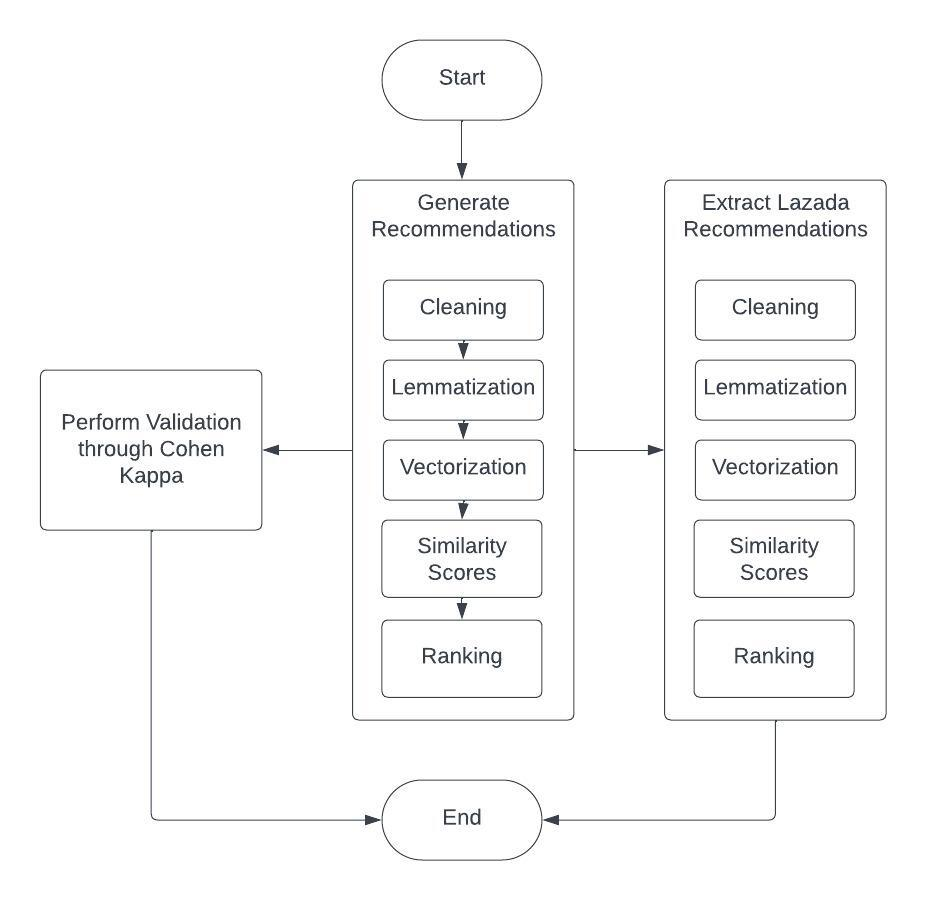

Describing further the items that are being displayed in the flowchart:

Initialization:

1 )Begin with two preselected products (Product 1 and Product 
    - Selection is needed to determine the similar products.

2) Generate Recommendations
    - For generating recommendations, it will undergo all the subprocess displayed and discussed earlier in the methodology.
    
3) Extract Lazada Recommendations
    - Extracting recommendations made by Lazada on Products 1 and Products
    - It will also undergo the same process as if generating recommendation
    - Scores will be computed with
4) Comparison of both recommendations
    - Comparing the combined scores for both recommendations made by the LT and Lazada
    
5) Validation of recommedation engine through Cohen's Kappa
    - LT members will rate if recommended products are similar.A flow chart of methodology to be performed for the recommendation engine:

### Code: `recommender_diff_shop`


This code defines a recommender function, recommender_diff_shop, which takes an input index corresponding to a product in a dataset. It retrieves information about the target product, such as name, SKU, seller, and category. The function then filters the dataset to include products from different sellers within the same category. Using lemmatization and TF-IDF (Term Frequency-Inverse Document Frequency) representation, it calculates cosine and Jaccard similarity scores between the target product and the filtered products. The combined similarity score, a weighted sum of cosine and Jaccard scores, is computed. Finally, the function outputs and displays information about the target product and the top 10 similar products from different sellers based on the combined similarity scores.

In [17]:
def recommender_diff_shop(input_index, hide_display=False):
    """
    Return SKUs of products with highest combined score of Jaccard and Cosine 
    distances from different shops.
    """

    product_index = input_index

    product_name = df_cleaned.loc[product_index, 'name']
    product_sku = df_cleaned.loc[product_index, 'sku']
    product_seller = df_cleaned.loc[product_index, 'sellerName']
    product_category = df_cleaned.loc[product_index, 'product_category']

    product_info_df = pd.DataFrame({
        'Attribute': ['Name', 'SKU', 'Seller', 'Category'],
        'Value': [product_name, product_sku, product_seller, product_category]
    })

    filtered_df = df_cleaned[(df_cleaned['sellerName'] != product_seller) & (
        df_cleaned['product_category'] == product_category) &
                             (df_cleaned.index != product_index)].copy()

    target_clothing = product_name

    filtered_df['name'] = filtered_df['name'].str.lower().apply(lemmatize_text)
    tfidf_matrix, tfidf_vectorizer = calculate_tfidf_matrix(
        filtered_df['name'])

    target_vector = tfidf_vectorizer.transform(
        [lemmatize_text(target_clothing)])
    cosine_sim_scores = compute_cosine_similarity(target_vector, tfidf_matrix)

    jaccard_sim_scores = filtered_df['name'].apply(
        lambda x: compute_jaccard_similarity(lemmatize_text(target_clothing), x))

    combined_scores = 0.7 * cosine_sim_scores + 0.3 * jaccard_sim_scores

    filtered_df['cosine_similarity'] = cosine_sim_scores
    filtered_df['jaccard_similarity'] = jaccard_sim_scores
    filtered_df['combined_similarity'] = combined_scores

    top_10_products = filtered_df.sort_values(
        by='combined_similarity', ascending=False).head(
        10)[['name', 'cosine_similarity', 'jaccard_similarity',
             'combined_similarity', 'sku', 'sellerName']]

    product_info_reset_index = product_info_df.reset_index(
        drop=True)
    top_10_products_reset_index = top_10_products.reset_index(drop=True)

    if not hide_display:
        print("Target Product Information:")

        display(product_info_reset_index.style.set_table_styles(
            [{'selector': 'table', 'props': 'margin: auto;'}]))

        print("\nTop 10 Similar Products from different shops:")
        display(top_10_products_reset_index.style.set_table_styles(
            [{'selector': 'table', 'props': 'margin: auto;'}]))

    return top_10_products_reset_index

### Code: `recommender_same_shop`

This code defines a recommender function, recommender_same_shop, which takes an input index corresponding to a product in a dataset. It retrieves information about the target product, such as name, SKU, seller, and category. The function then filters the dataset to include products from the same seller and within the same category but different from the target product. Using lemmatization and TF-IDF representation, it calculates cosine and Jaccard similarity scores between the target product and the filtered products. The combined similarity score, a weighted sum of cosine and Jaccard scores, is computed. Finally, the function outputs and displays information about the target product and the top 5 similar products from the same seller based on the combined similarity scores.

In [18]:
def recommender_same_shop(input_index, hide_display=False):
    """
    Return SKUs of products with highest combined score of Jaccard and Cosine
    distances from the same shop.
    """

    product_index = input_index

    product_name = df_cleaned.loc[product_index, 'name']
    product_sku = df_cleaned.loc[product_index, 'sku']
    product_seller = df_cleaned.loc[product_index, 'sellerName']
    product_category = df_cleaned.loc[product_index, 'product_category']

    product_info_df = pd.DataFrame({
        'Attribute': ['Name', 'SKU', 'Seller', 'Category'],
        'Value': [product_name, product_sku, product_seller, product_category]
    })

    filtered_df = df_cleaned[(df_cleaned['sellerName'] == product_seller) & (
        df_cleaned['product_category'] == product_category) & (df_cleaned.index != product_index)].copy()

    target_clothing = product_name

    filtered_df['name'] = filtered_df['name'].str.lower().apply(lemmatize_text)
    tfidf_matrix, tfidf_vectorizer = calculate_tfidf_matrix(
        filtered_df['name'])

    target_vector = tfidf_vectorizer.transform(
        [lemmatize_text(target_clothing)])
    cosine_sim_scores = compute_cosine_similarity(target_vector, tfidf_matrix)

    jaccard_sim_scores = filtered_df['name'].apply(
        lambda x: compute_jaccard_similarity(lemmatize_text(target_clothing), x))

    combined_scores = 0.7 * cosine_sim_scores + 0.3 * jaccard_sim_scores

    filtered_df['cosine_similarity'] = cosine_sim_scores
    filtered_df['jaccard_similarity'] = jaccard_sim_scores
    filtered_df['combined_similarity'] = combined_scores

    top_5_products = filtered_df.sort_values(
        by='combined_similarity', ascending=False).head(
        5)[['name', 'cosine_similarity', 'jaccard_similarity',
            'combined_similarity', 'sku', 'sellerName']]

    product_info_reset_index = product_info_df.reset_index(
        drop=True)
    top_5_products_reset_index = top_5_products.reset_index(drop=True)

    if not hide_display:
        print("Target Product Information:")
        display(product_info_reset_index.style.set_table_styles(
            [{'selector': 'table', 'props': 'margin: auto;'}]))

        print("\nTop 5 Similar Products from the Same Shop:")
        display(top_5_products_reset_index.style.set_table_styles(
            [{'selector': 'table', 'props': 'margin: auto;'}]))

    return top_5_products_reset_index

<hr>

<br>

There were two products that were randomly selected and confirmed to be still existing in the lazada platform. These are indexed at 10220 and 11494. Details are as follows:

In [19]:
input_index = 10220
product_index = input_index

product_name = df_cleaned.loc[product_index, 'name']
product_sku = df_cleaned.loc[product_index, 'sku']
product_seller = df_cleaned.loc[product_index, 'sellerName']
product_category = df_cleaned.loc[product_index, 'product_category']

product_info_df = pd.DataFrame({
        'Attribute': ['Name', 'SKU', 'Seller', 'Category'],
        'Value': [product_name, product_sku, product_seller, product_category]
    })


product_info_reset_index = product_info_df.reset_index(
        drop=True)


print("Test Product 1 Information:")
display(product_info_reset_index.style.set_table_styles(
        [{'selector': 'table', 'props': 'margin: auto;'}]))

input_index = 11494
product_index = input_index

product_name = df_cleaned.loc[product_index, 'name']
product_sku = df_cleaned.loc[product_index, 'sku']
product_seller = df_cleaned.loc[product_index, 'sellerName']
product_category = df_cleaned.loc[product_index, 'product_category']

product_info_df2 = pd.DataFrame({
        'Attribute': ['Name', 'SKU', 'Seller', 'Category'],
        'Value': [product_name, product_sku, product_seller, product_category]
    })


product_info_reset_index2 = product_info_df2.reset_index(
        drop=True)

print("Test Product 2 Information:")
display(product_info_reset_index2.style.set_table_styles(
        [{'selector': 'table', 'props': 'margin: auto;'}]))


Test Product 1 Information:


,Attribute,Value
0,Name,hoodie jacket mint with statement prints longsleeves
1,SKU,3774982362_PH
2,Seller,Samara Kloth Supplier
3,Category,womens_hoodies_sweatshirts


Test Product 2 Information:


,Attribute,Value
0,Name,womens sweatshirt with la vinyl print
1,SKU,2393622729_PH
2,Seller,K&K RTWs
3,Category,womens_hoodies_sweatshirts


<span style="display: block; height: 1px; border: 0; border-top: 10px solid #001DB1; margin: 1em 0; padding: 0;"></span>

### Test Product 1: Recommendation from same shop
The first test product is classified as a hoodie or a sweatshirt and sold by Samara Kloth Supplier, it is to be expected that all products from the recommendation should be coming from the same shop. From these recommendations, it can be seen that the combined similarity score ranges from 0.43 to 0.65.

In [20]:
_=recommender_same_shop(10220)

Target Product Information:


,Attribute,Value
0,Name,hoodie jacket mint with statement prints longsleeves
1,SKU,3774982362_PH
2,Seller,Samara Kloth Supplier
3,Category,womens_hoodies_sweatshirts



Top 5 Similar Products from the Same Shop:


,name,cosine_similarity,jaccard_similarity,combined_similarity,sku,sellerName
0,mint hoodie jacket statement print hood longsleeves qith subli print,0.669392,0.600000,0.648575,3775006231_PH,Samara Kloth Supplier
1,statement print hoodie jacket with print,0.536674,0.714286,0.589958,3775018165_PH,Samara Kloth Supplier
2,hoodie jacket print,0.475109,0.428571,0.461147,3636457193_PH,Samara Kloth Supplier
3,hoodie jacket print,0.475109,0.428571,0.461147,3303099546_PH,Samara Kloth Supplier
4,hoodie jacket print,0.475109,0.428571,0.461147,3625023849_PH,Samara Kloth Supplier


<span style="display: block; height: 1px; border: 0; border-top: 10px solid #001DB1; margin: 1em 0; padding: 0;"></span>

### Test Product 1: Recommendation from different shops
Using the same product, it is now time to look at the different recommendations from other sellers with the same clothing category. It should be expected that there are no seller that would be the same with the seller of the selected product. Similarity score ranges from 0.41 to 0.53.

In [21]:
_=recommender_diff_shop(10220)

Target Product Information:


,Attribute,Value
0,Name,hoodie jacket mint with statement prints longsleeves
1,SKU,3774982362_PH
2,Seller,Samara Kloth Supplier
3,Category,womens_hoodies_sweatshirts



Top 10 Similar Products from different shops:


,name,cosine_similarity,jaccard_similarity,combined_similarity,sku,sellerName
0,hoodie jacket vinyl print statement aesthetic print,0.572457,0.444444,0.534053,4055778143_PH,Happy Hoodie
1,pullover longsleeves with print,0.565757,0.375000,0.508530,3303627543_PH,Kloth PH
2,crophoodie jacket print longsleeves,0.547539,0.375000,0.495778,3775271223_PH,Happy Hoodie
3,pullover longsleeves print,0.565757,0.250000,0.471030,3627811552_PH,Zam-zam Online Shop
4,pullover longsleeves print,0.565757,0.250000,0.471030,3627514787_PH,SAMfinds
5,pullover longsleeves print,0.565757,0.250000,0.471030,3627795483_PH,Zam-zam Online Shop
6,statement croptop pullover hoodie,0.573882,0.222222,0.468384,331650709_PH,Fashion Express
7,trendy statement croptop pullover hoodie jacket,0.537779,0.300000,0.466445,378552353_PH,Fashion Express
8,trendy statement croptop pullover hoodie jacket,0.537779,0.300000,0.466445,377302487_PH,Fashion Express
9,trendy statement croptop pullover hoodie jacket,0.537779,0.300000,0.466445,377280805_PH,Fashion Express


<span style="display: block; height: 1px; border: 0; border-top: 10px solid #001DB1; margin: 1em 0; padding: 0;"></span>

### Test Product 2: Recommendation from same shop
The second test product has the same classification as the first test product. It can be seen that some related products have very high similarity and some have low similarity scores, with range from 0.24 to 0.86.

In [22]:
_=recommender_same_shop(11494)

Target Product Information:


,Attribute,Value
0,Name,womens sweatshirt with la vinyl print
1,SKU,2393622729_PH
2,Seller,K&K RTWs
3,Category,womens_hoodies_sweatshirts



Top 5 Similar Products from the Same Shop:


,name,cosine_similarity,jaccard_similarity,combined_similarity,sku,sellerName
0,womens hoodie sweatshirt with vinyl print,0.934780,0.714286,0.868631,2406725317_PH,K&K RTWs
1,unisex hoodie sweatshirt with vinyl print,0.652047,0.500000,0.606433,2389885891_PH,K&K RTWs
2,womens sweatshirt with pocket,0.507025,0.428571,0.483489,2374873453_PH,K&K RTWs
3,unisex sweatshirt free size frame to size smalllarge with vinyl print terry brass cotton fabric,0.305151,0.250000,0.288606,3067377257_PH,K&K RTWs
4,womens hoodie shirt,0.298722,0.125000,0.246606,2279749545_PH,K&K RTWs


<span style="display: block; height: 1px; border: 0; border-top: 10px solid #001DB1; margin: 1em 0; padding: 0;"></span>

### Test Product 2: Recommendation from different shops
Same with the test product 1, recommendations from different shops were considered and can be seen that the seller of the product test 1 is being recommended here. In terms of similarity scores are ranging from 0.33 to 0.44.

In [23]:
_=recommender_diff_shop(11494)

Target Product Information:


,Attribute,Value
0,Name,womens sweatshirt with la vinyl print
1,SKU,2393622729_PH
2,Seller,K&K RTWs
3,Category,womens_hoodies_sweatshirts



Top 10 Similar Products from different shops:


,name,cosine_similarity,jaccard_similarity,combined_similarity,sku,sellerName
0,pullover sweatshirt with print,0.438305,0.428571,0.435385,3826827668_PH,Samara Kloth Supplier
1,hoodie jacket vinyl print statement aesthetic print,0.529632,0.200000,0.430742,4055778143_PH,Happy Hoodie
2,pullover crew neck with vinyl print for mens and womens,0.468549,0.333333,0.427984,3354048602_PH,Jemella's Online Shop
3,hoodie terno jogger vinyl print,0.456317,0.222222,0.386089,3555137076_PH,Divifindsph
4,pullover trend sweatshirt color vinyl print minimalists statement basic longsleeves,0.440142,0.230769,0.377330,3952773947_PH,Samara Kloth Supplier
5,womens pullover sweatshirt loose fashion casual print jacket unisex hood sweater womens trend,0.443669,0.200000,0.370568,3403244041_PH,alvla.ph
6,tokyo print pullover trend color sweatshirt vinyl print minimalists aesthetic statement basic longsleeves,0.424231,0.200000,0.356962,3952958844_PH,Samara Kloth Supplier
7,pullover sweatshirt with print longsleeves,0.346909,0.375000,0.355336,3808856066_PH,Samara Kloth Supplier
8,pullover sweatshirt with print longsleeves,0.346909,0.375000,0.355336,3827045293_PH,Samara Kloth Supplier
9,newyork print pullover trend color sweatshirt vinyl print minimalists aesthetic statement basic longsleeves,0.405203,0.200000,0.343642,3953029438_PH,Samara Kloth Supplier


<span style="display: block; height: 1px; border: 0; border-top: 10px solid #001DB1; margin: 1em 0; padding: 0;"></span>

### LT Recommendation vs Lazada's Recommendation

To have a better appreciation, it was deemed better to compare recommendations made by the LT and Lazada itself. What was done here was to look for the same two products and manually extract both the same shop recommendations and the other shop recommendations. Afterwards, the similarity score was computed and then compared side by side.

The manually extracted test data are two csv files that contains product names of the recommendations. Sadly the extraction of the test data doesn't allow for webscraping as the recommendations change depending on the behavior of the user.

`manual_extracted_test_data_1.csv` is for the product test 1 and `manual_extracted_test_data2.csv` is for product test 2.

A sample of how it would look like would be:

In [24]:
test_data1 = pd.read_csv('manual_extracted_test_data_1.csv')
test_data1.head(3)

,name,sku,recommendation_same_shop,recommendation_diff_shop
0,hoodie jacket mint with statement prints longs...,3774982362_PH,PANDA HOODIE JACKET WHITE PRINT,UNISEX HOODIE JACKET WITHOUT ZIPPER
1,hoodie jacket mint with statement prints longs...,3774982362_PH,KOREAAN CROPHOODIE JACKET PRINTS,Long Sleeve Turtle Neck Knitted For Women
2,hoodie jacket mint with statement prints longs...,3774982362_PH,PULLOVER FASHION SWEATSHIRTS WITH PRINTS,Crop Top Long Sleeve cotton Sexy Skinny Casual...


Codes are shown below which would be lazada_same_shop and lazada_diff_shop, these are codes that would compute for the similarity scores between the test products and the manually extracted recommendations from Lazada.

In [25]:
def lazada_same_shop(input_index, hide_display=False):
    """
    Return scores for manually extracted recommendations from LAZADA.
    """

    product_index = input_index

    product_name = df_cleaned.loc[product_index, 'name']
    product_sku = df_cleaned.loc[product_index, 'sku']
    product_seller = df_cleaned.loc[product_index, 'sellerName']
    product_category = df_cleaned.loc[product_index, 'product_category']

    product_info_df = pd.DataFrame({
        'Attribute': ['Name', 'SKU', 'Seller', 'Category'],
        'Value': [product_name, product_sku, product_seller, product_category]
    })

    target_clothing = product_name

    if input_index == 10220:
        test_data = pd.read_csv('manual_extracted_test_data_1.csv')
    elif input_index == 11494:
        test_data = pd.read_csv('manual_extracted_test_data_2.csv')

    test_data['recommendation_same_shop'].fillna('', inplace=True)

    test_data['recommendation_same_shop'] = test_data[
        'recommendation_same_shop'].apply(
        lambda x: clean_and_lower(x))

    test_data['recommendation_same_shop'] = test_data[
        'recommendation_same_shop'].str.lower(
    ).apply(lemmatize_text)

    tfidf_matrix, tfidf_vectorizer = calculate_tfidf_matrix(
        test_data['recommendation_same_shop'])

    target_vector = tfidf_vectorizer.transform(
        [lemmatize_text(target_clothing)])

    cosine_sim_scores = compute_cosine_similarity(target_vector, tfidf_matrix)

    jaccard_sim_scores = test_data['recommendation_same_shop'].apply(
        lambda x: compute_jaccard_similarity(lemmatize_text(target_clothing), x))

    combined_scores = 0.7 * cosine_sim_scores + 0.3 * jaccard_sim_scores

    test_data['cosine_similarity'] = cosine_sim_scores
    test_data['jaccard_similarity'] = jaccard_sim_scores
    test_data['combined_similarity'] = combined_scores

    comparison = test_data.sort_values(by='combined_similarity',
                                       ascending=False).head(
        5)[['recommendation_same_shop', 'cosine_similarity',
            'jaccard_similarity', 'combined_similarity']]

    product_info_reset_index = product_info_df.reset_index(
        drop=True)
    comparison_reset_index = comparison.reset_index(drop=True)
    if not hide_display:
        print("Target Product Information:")
        display(product_info_reset_index.style.set_table_styles(
            [{'selector': 'table', 'props': 'margin: auto;'}]))

        print("\nTop 5 Similar Products from the Same Shop:")
        display(comparison_reset_index.style.set_table_styles(
            [{'selector': 'table', 'props': 'margin: auto;'}]))

    return comparison_reset_index

In [26]:
def lazada_diff_shop(input_index, hide_display=False):
    """
    Return scores for manually extracted recommendations from LAZADA.
    """

    product_index = input_index

    product_name = df_cleaned.loc[product_index, 'name']
    product_sku = df_cleaned.loc[product_index, 'sku']
    product_seller = df_cleaned.loc[product_index, 'sellerName']
    product_category = df_cleaned.loc[product_index, 'product_category']

    product_info_df = pd.DataFrame({
        'Attribute': ['Name', 'SKU', 'Seller', 'Category'],
        'Value': [product_name, product_sku, product_seller, product_category]
    })

    target_clothing = product_name

    if input_index == 10220:
        test_data = pd.read_csv('manual_extracted_test_data_1.csv')
    elif input_index == 11494:
        test_data = pd.read_csv('manual_extracted_test_data_2.csv')

    test_data = test_data.head(10)

    test_data['recommendation_diff_shop'].fillna('', inplace=True)

    test_data['recommendation_diff_shop'] = test_data['recommendation_diff_shop'].apply(
        lambda x: clean_and_lower(x))

    test_data['recommendation_diff_shop'] = test_data['recommendation_diff_shop'].str.lower(
    ).apply(lemmatize_text)

    tfidf_matrix, tfidf_vectorizer = calculate_tfidf_matrix(
        test_data['recommendation_diff_shop'])

    target_vector = tfidf_vectorizer.transform(
        [lemmatize_text(target_clothing)])

    cosine_sim_scores = compute_cosine_similarity(target_vector, tfidf_matrix)

    jaccard_sim_scores = test_data['recommendation_diff_shop'].apply(
        lambda x: compute_jaccard_similarity(lemmatize_text(target_clothing), x))

    combined_scores = 0.7 * cosine_sim_scores + 0.3 * jaccard_sim_scores

    test_data['cosine_similarity'] = cosine_sim_scores
    test_data['jaccard_similarity'] = jaccard_sim_scores
    test_data['combined_similarity'] = combined_scores

    comparison = test_data.sort_values(
        by='combined_similarity', ascending=False).head(
        10)[['recommendation_diff_shop', 'cosine_similarity',
             'jaccard_similarity', 'combined_similarity']]

    product_info_reset_index = product_info_df.reset_index(
        drop=True)
    comparison_reset_index = comparison.reset_index(drop=True)

    if not hide_display:
        print("Target Product Information:")
        display(product_info_reset_index.style.set_table_styles(
            [{'selector': 'table', 'props': 'margin: auto;'}]))

        print("\nTop 10 Similar Products from Different Shops:")
        display(comparison_reset_index.style.set_table_styles(
            [{'selector': 'table', 'props': 'margin: auto;'}]))

    return comparison_reset_index

<hr>

### Test Lazada's Recommendations

Below is the result of the combined similarity scores for the recommendations from different shops. It can be seen that there are recommended products that have 0 similarity scores. This might be due to the recommendations being fed basing on the historical search results of the user at that time, it is not really recommending purely based on the similarity of the product.

<hr>

####  Recommendation from different shops

In [27]:
_ = lazada_diff_shop(10220)

Target Product Information:


,Attribute,Value
0,Name,hoodie jacket mint with statement prints longsleeves
1,SKU,3774982362_PH
2,Seller,Samara Kloth Supplier
3,Category,womens_hoodies_sweatshirts



Top 10 Similar Products from Different Shops:


,recommendation_diff_shop,cosine_similarity,jaccard_similarity,combined_similarity
0,skateboard frog hoodie women oversized cartoon print clothe casual pullover kawaii fleece streetwear hoodied long sleeve couple hoodie jacket korean jacket for men anime jacket hoodiejacket for men with hoodie couple jacket with hoodie oversized,0.497512,0.148148,0.392703
1,unisex hoodie jacket without zipper,0.446672,0.200000,0.372671
2,crop hoodie swagger girl print,0.423884,0.200000,0.356719
3,unisex plain hoodie jacket mxxl,0.382346,0.200000,0.327642
4,hoodie jacket kniited for women korean style best seller jacket knit fashionable outfit for women hoodie jacket knit with zipper high quality ladies trendy casual wear knit jacket,0.360115,0.125000,0.289581
5,pullover pure cotton brass print sweatshirt for unisex,0.209274,0.071429,0.167921
6,plain women jacket sweater thick hood coat wzipper mxxl,0.130426,0.066667,0.111298
7,long sleeve turtle neck knit for women,0.000000,0.000000,0.000000
8,crop top long sleeve cotton sexy skinny casual fashion women clothe high waist sweater,0.000000,0.000000,0.000000
9,jshop women fashion strip clothe blouse thin long sleeve blouse,0.000000,0.000000,0.000000


<hr>

####  Recommendation from the same shops

Now looking at the same shop recommendations, using the product test 2, even the recommendations of Lazada within the same shop have 0 similarity scores.

In [28]:
_ = lazada_same_shop(11494)

Target Product Information:


,Attribute,Value
0,Name,womens sweatshirt with la vinyl print
1,SKU,2393622729_PH
2,Seller,K&K RTWs
3,Category,womens_hoodies_sweatshirts



Top 5 Similar Products from the Same Shop:


,recommendation_same_shop,cosine_similarity,jaccard_similarity,combined_similarity
0,vintage bomber crop top frame sl with vinyl print,0.507426,0.250000,0.430198
1,unisex hoodie jacket free size fit to sl with ny vinyl print terry brass cotton,0.365358,0.166667,0.305751
2,kid unisex bomber jacket with zipper yrs old,0.000000,0.076923,0.023077
3,kid unisex hoodie jacketpant set with zipper yrs old,0.000000,0.071429,0.021429
4,hoodie zipper knit jacket frame small to semi large,0.000000,0.000000,0.000000


<hr>

####  Recommender Score Comparison

To easily see the difference of the similarity scores made by the LT and Lazada, dataframes of the combined scores were concatenated. Results are as follows: 

    Target product:

<div style="text-align:left">
    
| Attribute | Value                                           |
|-----------|-------------------------------------------------|
| Name      | Hoodie Jacket Mint with Statement Prints Long Sleeves |
| SKU       | 3774982362_PH                                   |
| Seller    | Samara Kloth Supplier                           |
| Category  | Womens Hoodies Sweatshirts                      |
| Attribute | Value                                           |

</div>

<br> 

<hr>

##### Test: Recommendation from same shops

In [29]:
# Code for comparing same shop recommendations.
LTrecommender_same = recommender_same_shop(10220, True)
Lazadarecommender_same = lazada_same_shop(10220, True)

df1 = ['name', 'combined_similarity']  # Replace with actual column names
df2 = ['recommendation_same_shop', 'combined_similarity']  # Replace with actual column names

df1_selected = LTrecommender_same[df1]
df2_selected = Lazadarecommender_same[df2]

# Concatenate the selected columns vertically (along the rows)
new_same_df = pd.concat([df1_selected, df2_selected], ignore_index=True, axis=1)
c_names = ['Product Name', 'LT Recommender Score', 'Product Name',
           'Lazada Recommender Score']

new_same_df.columns = c_names

In [30]:
new_same_df

,Product Name,LT Recommender Score,Product Name,Lazada Recommender Score
0,mint hoodie jacket statement print hood longsl...,0.648575,panda hoodie jacket white print,0.594376
1,statement print hoodie jacket with print,0.589958,koreaan crophoodie jacket print,0.374779
2,hoodie jacket print,0.461147,newyork crophoodie jacket,0.222440
3,hoodie jacket print,0.461147,minimal print crophoodie,0.187103
4,hoodie jacket print,0.461147,pullover fashion sweatshirts with print,0.177012


Based on the result above, for same shop results, the LT recommender score has relatively higher values than the Lazada Recommender score. As mentioned earlier, Lazada recommender bases its recommendation on historical searches and not purely on similarity.

For different shop recommendations, it can be seen that the LT recommender has better recommendations than the Lazada recommender score if only similarity is being taken into cosideration.

<br>
<hr>

##### Test: Recommendation from different shops

In [31]:
LTrecommender_diff = recommender_diff_shop(10220, True)
Lazadarecommender_diff = lazada_diff_shop(10220, True)

df1 = ['name', 'combined_similarity']  # Replace with actual column names
df2 = ['recommendation_diff_shop', 'combined_similarity']  # Replace with actual column names

df1_selected = LTrecommender_diff[df1]
df2_selected = Lazadarecommender_diff[df2]

# Concatenate the selected columns vertically (along the rows)
new_diff_df = pd.concat([df1_selected, df2_selected], ignore_index=True, axis=1)
c_names = ['Product Name', 'LT Recommender Score', 'Product Name',
           'Lazada Recommender Score']

new_diff_df.columns = c_names

In [32]:
new_diff_df

,Product Name,LT Recommender Score,Product Name,Lazada Recommender Score
0,hoodie jacket vinyl print statement aesthetic ...,0.534053,skateboard frog hoodie women oversized cartoon...,0.392703
1,pullover longsleeves with print,0.508530,unisex hoodie jacket without zipper,0.372671
2,crophoodie jacket print longsleeves,0.495778,crop hoodie swagger girl print,0.356719
3,pullover longsleeves print,0.471030,unisex plain hoodie jacket mxxl,0.327642
4,pullover longsleeves print,0.471030,hoodie jacket kniited for women korean style b...,0.289581
5,pullover longsleeves print,0.471030,pullover pure cotton brass print sweatshirt fo...,0.167921
6,statement croptop pullover hoodie,0.468384,plain women jacket sweater thick hood coat wzi...,0.111298
7,trendy statement croptop pullover hoodie jacket,0.466445,long sleeve turtle neck knit for women,0.000000
8,trendy statement croptop pullover hoodie jacket,0.466445,crop top long sleeve cotton sexy skinny casual...,0.000000
9,trendy statement croptop pullover hoodie jacket,0.466445,jshop women fashion strip clothe blouse thin l...,0.000000


In validating the performance of the recommendation engine, the cohen's kappa will be applied. As mentioned, four members of the LT will be raters. Calculation of the cohen's kappa will be through the sklearn.metrics library utilizing the cohen_kappa_score function. The result of manual validation is exported below as a dataframe. Since Cohen's kappa is pairwise, all possible pair combinations were determined. A sample Cohen Kappa computation is seen below for Product test 1.

In [33]:
ck_scores = pd.read_csv('Cohen Kappa Rating.csv')

ck_scores_test1diff = ck_scores.iloc[0:10, 2:6]

ck_scores_test1same = ck_scores.iloc[10:15, 2:6]
ck_scores_test2diff = ck_scores.iloc[15:25, 2:6]
ck_scores_test2same = ck_scores.iloc[15:20, 2:6]

rater1 = ck_scores_test1diff.iloc[:, 0]
rater2 = ck_scores_test1diff.iloc[:, 1]
rater3 = ck_scores_test1diff.iloc[:, 2]
rater4 = ck_scores_test1diff.iloc[:, 3]

all_ratings = [rater1, rater2, rater3, rater4]

for i in range(len(all_ratings)):
    for j in range(i + 1, len(all_ratings)):
        kappa = cohen_kappa_score(all_ratings[i], all_ratings[j])
        print(f"Cohen's Kappa between Rater {i+1} and Rater {j+1}: {kappa}")


Cohen's Kappa between Rater 1 and Rater 2: 0.6153846153846154
Cohen's Kappa between Rater 1 and Rater 3: 0.44444444444444453
Cohen's Kappa between Rater 1 and Rater 4: 0.8
Cohen's Kappa between Rater 2 and Rater 3: 0.7826086956521738
Cohen's Kappa between Rater 2 and Rater 4: 0.8
Cohen's Kappa between Rater 3 and Rater 4: 0.6


The Kappa values suggest that the raters generally agree with each other about the engine's recommendations. However, the level of agreement varies among the raters. Overall, it indicates a consistent alignment in the recommended choices.

<span style="display: block; height: 1px; border: 0; border-top: 10px solid #001DB1; margin: 1em 0; padding: 0;"></span>

# <span style="color:#FF4922; font-weight:bold"> RECOMMENDATIONS </span>


1) **Multi-Dimensional Product Matching**:
Extend the study to incorporate multi-dimensional product matching, considering factors beyond textual features. Include image analysis, user-generated content, and product attributes to enhance the precision of recommendations, especially in visually-oriented product categories.
 
2) **User Trust and Satisfaction Metrics**:
Develop metrics to quantitatively measure user trust and satisfaction in e-commerce recommendation systems. Investigate how different recommendation strategies impact these metrics, providing insights into user perception and platform credibility.
 
3) **Machine Learning Explainability**:
Investigate methods to enhance the explainability of machine learning models used in recommendation engines. Address the "black-box" nature of some algorithms, providing users with insights into why specific recommendations are made and fostering transparency.
 
4) **Personalization and Privacy Trade-offs**:
Delve into the trade-offs between personalization and privacy in e-commerce recommendation systems. Analyze user attitudes towards data privacy and explore strategies to balance personalized recommendations with robust privacy safeguards.

5) **Spelling Correction**:
It is recommended to correct the spelling of words, since this will significantly improve the similarity scores of products.

6) **Similarity Measures**:
Other similarity measures may be considered to optimally show the likeness of datasets.

<span style="display: block; height: 1px; border: 0; border-top: 10px solid #001DB1; margin: 1em 0; padding: 0;"></span>

# <span style="color:#FF4922; font-weight:bold"> CONCLUSION </span>

The study focuses on addressing challenges in the e-commerce industry, particularly in refining recommendation engines to provide more 
precise, unbiased, and relevant results. While e-commerce platforms have become essential, challenges such as the filter bubble effect and 
biased recommendations impact user satisfaction and trust.

It was found out that in terms of recommendation purely based on similarity, the LT recommendation engine has better similarity scores using the Cosine similarity and Jaccard distance.

To fully increase the confidence in using similarity matching, it is either improve quality of data like error free inputs or improve pre-processing codes that will enable to clean and make-up for the errors or inaccuracies of the data.

In this regard,Lazada, a prominent e-commerce platform, utilizes a recommendation engine strategy that considers visitor product histories. However, concerns about inaccuracies and biases in recommendations have been raised, wherein the LT believes that for inaccuracies and issues to be resolved a simple and straightforward approach might be the key.


# References

- Statista. "Philippines: Usage of E-commerce from COVID-19 Lockdown 2020." Accessed November 30, 2023, https://www.statista.com/statistics/1225172/philippines-usage-e-commerce-covid-19-lockdown/

- James Relativo, "Ditching search engines, Southeast Asians look for products on e-commerce sites: Report," The Philippine Star, September 1, 2022, https://www.philstar.com/business/technology/2022/09/01/2206658/ditching-search-engines-southeast-asians-look-products-ecommerce-sites-report.

- Seller Center Lazada Singapore. Product Search Findability. https://sellercenter.lazada.sg/seller/helpcenter/product-search-findability.html

- Truhandito, Pandu. "How You Can Like Lazada, ID, Blibli, and E-commerce Product Recommendations." https://www.linkedin.com/pulse/how-you-can-like-lazadaid-blibli-ecommerce-product-pandu-truhandito/

- Zahrotun, Lisna. "Comparison of Jaccard Similarity, Cosine Similarity, and Combined: Both of the Data Clustering with Shared Nearest Neighbor Method."


- Title: Anyone getting creepy Lazada search recos?
    URL: https://www.reddit.com/r/Philippines/comments/yf4k09/anyone_getting_creepy_lazada_search_recos/

- Title: Bakit nirerecommend ito ng Lazada, it's so wrong!
    URL: https://www.reddit.com/r/ShopeePH/comments/17srszu/bakit_nirerecommend_eto_ng_lazada_its_so_wrong/


- Title: "E-commerce User Experience: 9 Tips to Boost Your Online Store’s UX"
    Author: Tracey Wallace
    URL: https://www.bigcommerce.com/blog/ecommerce-ux/


- Title: "User Experience & Its Impact on Revenue Growth"
    Author: Not specified
    URL: https://www.divami.com/blog/user-experience-its-impact-on-revenue-growth